### New York City Airbnb data:

#### This is a dataset that contains Airbnb data on New York City. You will use it to practice your new EDA (exploratory data analysis) and data cleaning skills.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Step 1: Use the following online dataset: https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv

In [2]:
# Read the dataset from the URL and assing it to a Pandas DataFrame
df_airbnb_ny = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
df_airbnb_ny

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


##### Step 2: Find patterns and valuable information as much as you can. Make graphs that help us understand the patterns found, get some statistics, create new variables if needed, etc.

In [3]:
# Obtain the information of the dataset
df_airbnb_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We can see that there are 16 columns and 48,895 rows in the dataset. There are some missing values in the columns 'name', 'host_name', 'last_review' and 'reviews_per_month'. This dataset has 6 numerical columns and 10 categorical columns where the numerical columns are: 'id', 'host_id', 'latitude', 'longitude', 'price' and 'minimum_nights' and the categorical columns are: 'name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'

In [4]:
# We need to drop the columns 'name', 'host_name', 'last_review' and 'reviews_per_month' because they are not relevant for our analysis
df_airbnb_ny.drop(['id', 'host_id', 'last_review', 'reviews_per_month'], axis=1, inplace=True)
df_airbnb_ny.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [5]:
# let's rename the column 'neighbourhood_group' to 'areas' and 'neighbourhood' to 'neighborhood'
df_airbnb_ny.rename(columns={'neighbourhood_group':'areas', 'neighbourhood':'neighborhood'}, inplace=True)
# We check again the information of the dataset
df_airbnb_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_name                       48874 non-null  object 
 2   areas                           48895 non-null  object 
 3   neighborhood                    48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(5), object(

In [6]:
# Now, we need to analyze the data in order to know if there are outliers
df_airbnb_ny.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_22690/3704737744.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df_airbnb_ny, x = 'price', ax=ax[0], palette='vlag')
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


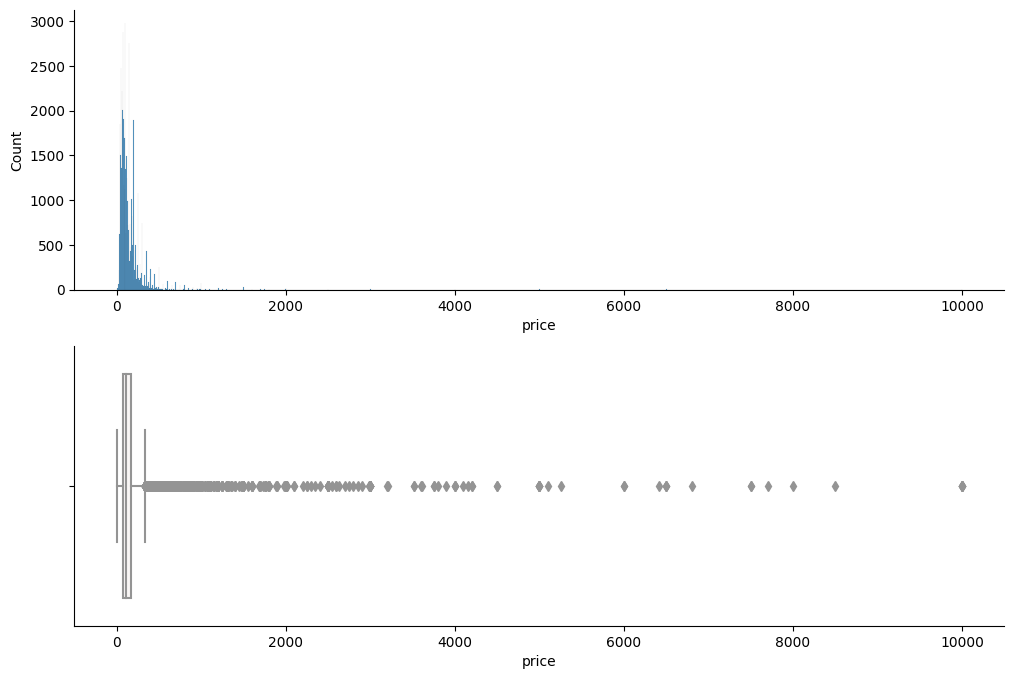

In [7]:
# We can see that the minimum value of 'price' is 0 and the maximum value is 10,000. We need to check if there are outliers with the boxplot and the histogram
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Histogram
sns.histplot(data = df_airbnb_ny, x = 'price', ax=ax[0], palette='vlag')
# Boxplot
sns.boxplot(data = df_airbnb_ny, x = 'price', ax=ax[1], palette='vlag')
sns.despine()
sns.set_style('whitegrid')
plt.show()


In [8]:
# We can see that there are outliers in the column 'price'. We need to remove them with the IQR method
# First, we need to calculate the IQR
Q1 = df_airbnb_ny['price'].quantile(0.25)
Q3 = df_airbnb_ny['price'].quantile(0.75)
IQR = Q3 - Q1
print('The IQR is: ',IQR)

# Now, we need to calculate the lower and upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('The lower limit is: ',lower_limit, 'and the upper limit is: ',upper_limit)

# We need to remove the outliers from the dataset and the 0 values
df_airbnb_ny = df_airbnb_ny[(df_airbnb_ny['price'] > lower_limit) & (df_airbnb_ny['price'] < upper_limit) & (df_airbnb_ny['price'] != 0)]
df_airbnb_ny.describe()


The IQR is:  106.0
The lower limit is:  -90.0 and the upper limit is:  334.0


,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,45907.000000,45907.000000,45907.000000,45907.00000,45907.000000,45907.000000,45907.000000
mean,40.728491,-73.950734,119.975755,6.93587,23.942471,6.620755,109.356590
std,0.055336,0.046473,68.100096,19.85941,45.318126,30.942071,130.277969
min,40.499790,-74.244420,10.000000,1.00000,0.000000,1.000000,0.000000
25%,40.689230,-73.981920,65.000000,1.00000,1.000000,1.000000,0.000000
50%,40.721770,-73.954370,100.000000,2.00000,5.000000,1.000000,39.000000
75%,40.763405,-73.934330,159.000000,5.00000,24.000000,2.000000,216.000000
max,40.913060,-73.712990,333.000000,1250.00000,629.000000,327.000000,365.000000


/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_22690/643221907.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df_airbnb_ny, x = 'minimum_nights', ax=ax[0], palette='vlag')
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


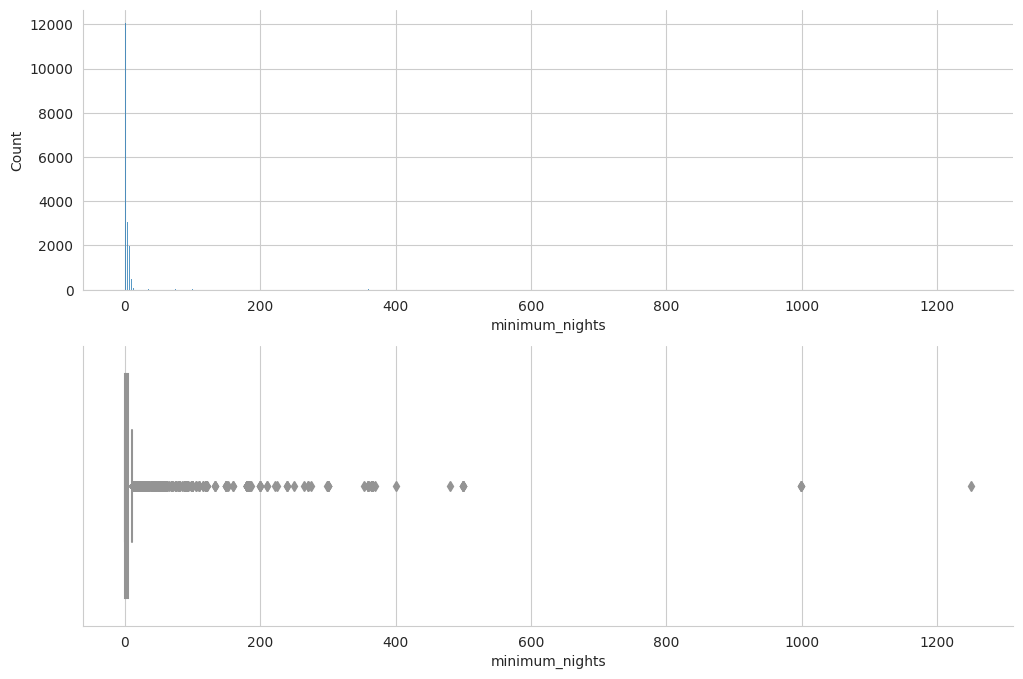

In [9]:
# We can see that the minimum value of 'minimum_nights' is 1 and the maximum value is 1250. We need to check if there are outliers with the boxplot and the histogram
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Histogram
sns.histplot(data = df_airbnb_ny, x = 'minimum_nights', ax=ax[0], palette='vlag')
# Boxplot
sns.boxplot(data = df_airbnb_ny, x = 'minimum_nights', ax=ax[1], palette='vlag')
sns.despine()
sns.set_style('whitegrid')
plt.show()

In [10]:
# We can see that there are outliers in the column 'minimum_nights'. We need to remove them with the IQR method
# First, we need to calculate the IQR
Q1 = df_airbnb_ny['minimum_nights'].quantile(0.25)
Q3 = df_airbnb_ny['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1
print('The IQR is: ',IQR)

# Now, we need to calculate the lower and upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('The lower limit is: ',lower_limit, 'and the upper limit is: ',upper_limit)

# We need to remove the outliers from the dataset
df_airbnb_ny = df_airbnb_ny[(df_airbnb_ny['minimum_nights'] > lower_limit) & (df_airbnb_ny['minimum_nights'] < upper_limit)]
df_airbnb_ny.describe()

The IQR is:  4.0
The lower limit is:  -5.0 and the upper limit is:  11.0


,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,39698.000000,39698.000000,39698.000000,39698.000000,39698.000000,39698.000000,39698.000000
mean,40.727571,-73.949142,119.028364,2.689758,26.385082,3.073858,97.187465
std,0.056299,0.047724,67.163779,1.849851,47.488054,19.753662,124.378586
min,40.499790,-74.244420,10.000000,1.000000,0.000000,1.000000,0.000000
25%,40.688070,-73.981050,65.000000,1.000000,1.000000,1.000000,0.000000
50%,40.720075,-73.953320,100.000000,2.000000,7.000000,1.000000,25.000000
75%,40.763267,-73.932160,155.000000,3.000000,29.000000,2.000000,179.000000
max,40.913060,-73.712990,333.000000,10.000000,629.000000,327.000000,365.000000


/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

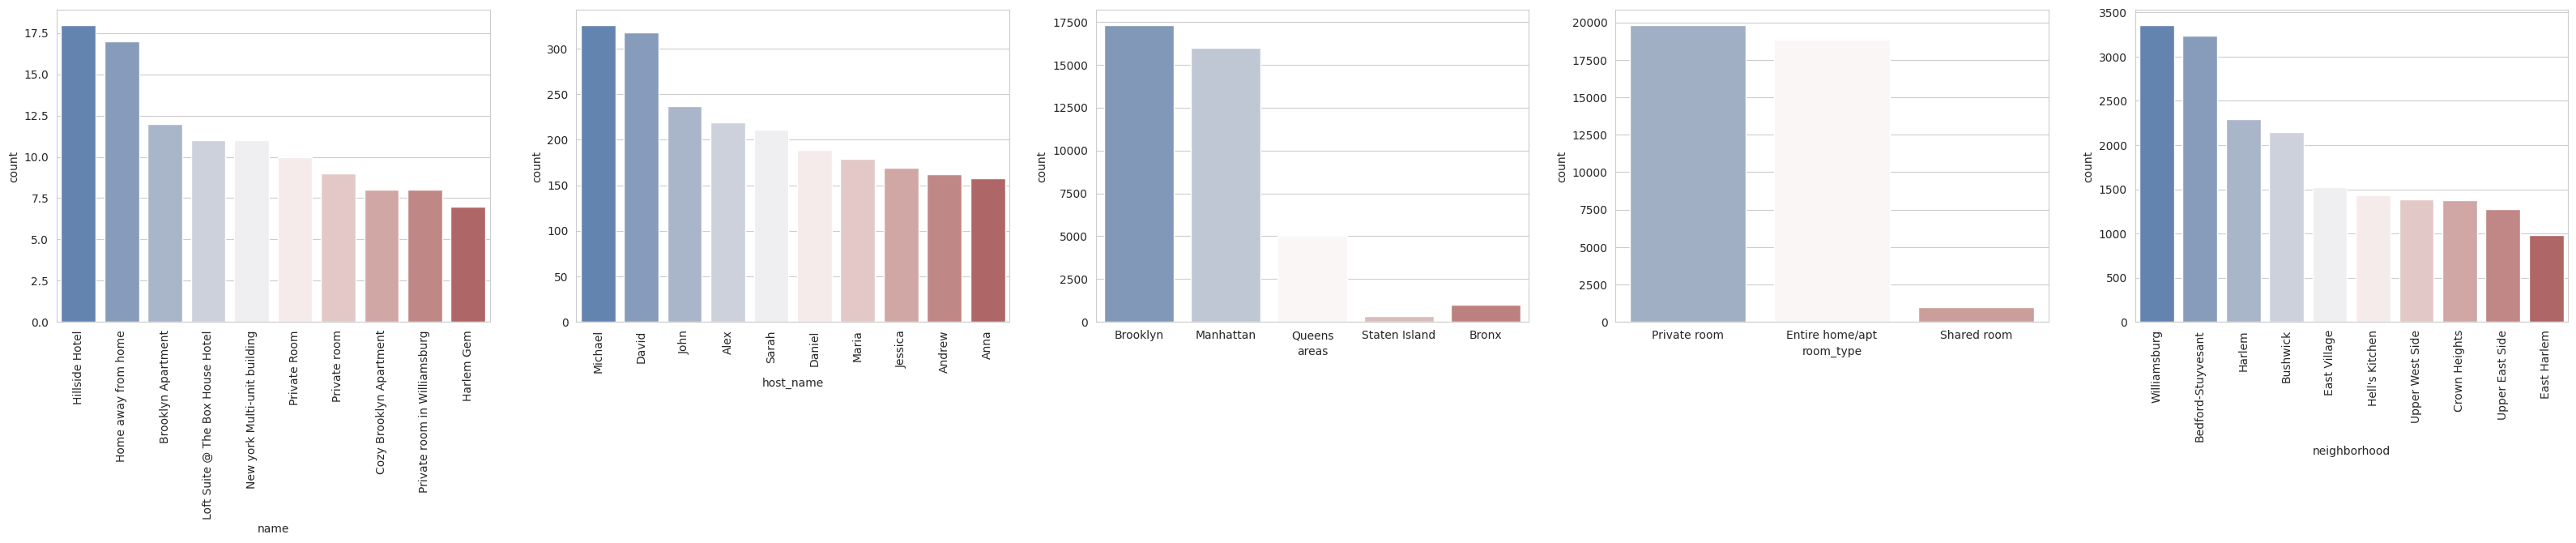

In [17]:
# Univariant analysis of the categorical variables
fig, ax = plt.subplots(1, 5, figsize=(40, 5))

# Countplot for 'name' top 10
sns.countplot(data = df_airbnb_ny, x = 'name', ax=ax[0], palette='vlag', order=df_airbnb_ny['name'].value_counts().iloc[:10].index).set_xticklabels(ax[0].get_xticklabels(), rotation=90)
# Countplot for 'host_name' top 10
sns.countplot(data = df_airbnb_ny, x = 'host_name', ax=ax[1], palette='vlag', order=df_airbnb_ny['host_name'].value_counts().iloc[:10].index).set_xticklabels(ax[1].get_xticklabels(), rotation=90)
# Countplot for 'areas'
sns.countplot(data = df_airbnb_ny, x = 'areas', ax=ax[2], palette='vlag')
# Countplot for 'room_type'
sns.countplot(data = df_airbnb_ny, x = 'room_type', ax=ax[3], palette='vlag')
# Countplot for 'neighborhood' top 10
sns.countplot(data = df_airbnb_ny, x = 'neighborhood', ax=ax[4], palette='vlag', order=df_airbnb_ny['neighborhood'].value_counts().iloc[:10].index).set_xticklabels(ax[4].get_xticklabels(), rotation=90)

plt.show()

We can observe that the most of the listings are in Brooklyn, the private room is the most common room type and the most common neighborhood is Williamsburg

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and wil

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and wil

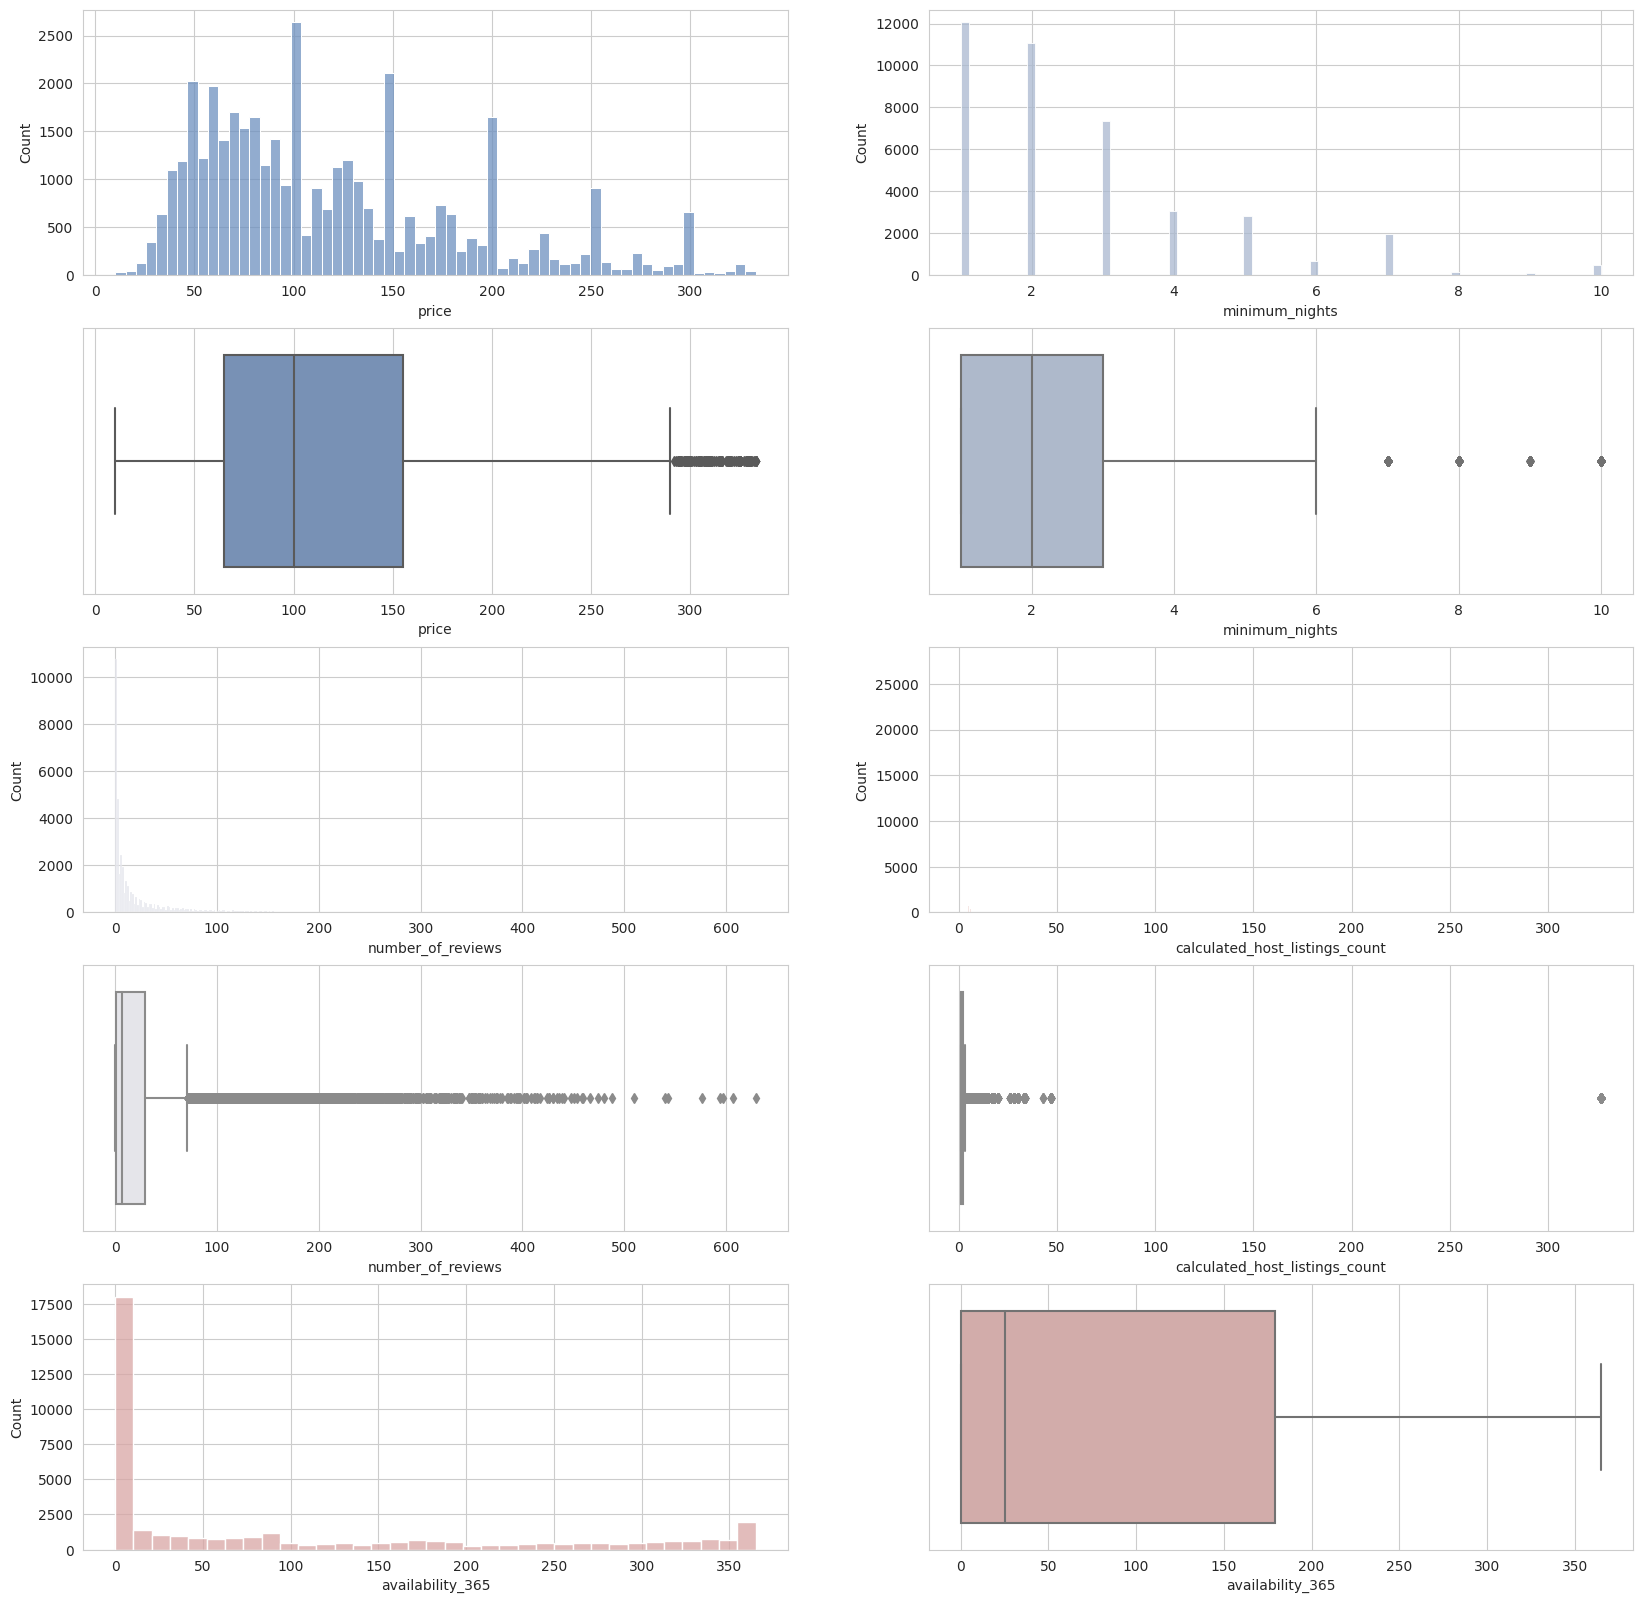

In [12]:
# Univariant analysis of the numerical variables with the histogram and the boxplot
fig, ax = plt.subplots(5, 2, figsize=(20, 20))

colors = sns.color_palette("vlag")

# Histogram for 'price'
sns.histplot(data = df_airbnb_ny, x = 'price', ax=ax[0,0], color=colors[0])
# Boxplot for 'price'
sns.boxplot(data = df_airbnb_ny, x = 'price', ax=ax[1,0], color=colors[0])
# Histogram for 'minimum_nights'
sns.histplot(data = df_airbnb_ny, x = 'minimum_nights', ax=ax[0,1], color=colors[1])
# Boxplot for 'minimum_nights'
sns.boxplot(data = df_airbnb_ny, x = 'minimum_nights', ax=ax[1,1], color=colors[1])
# Histogram for 'number_of_reviews'
sns.histplot(data = df_airbnb_ny, x = 'number_of_reviews', ax=ax[2,0], color=colors[2])
# Boxplot for 'number_of_reviews'
sns.boxplot(data = df_airbnb_ny, x = 'number_of_reviews', ax=ax[3,0], color=colors[2])
# Histogram for 'calculated_host_listings_count'
sns.histplot(data = df_airbnb_ny, x = 'calculated_host_listings_count', ax=ax[2,1], color=colors[3])
# Boxplot for 'calculated_host_listings_count'
sns.boxplot(data = df_airbnb_ny, x = 'calculated_host_listings_count', ax=ax[3,1], color=colors[3])
# Histogram for 'availability_365'
sns.histplot(data = df_airbnb_ny, x = 'availability_365', ax=ax[4,0], color=colors[4])
# Boxplot for 'availability_365'
sns.boxplot(data = df_airbnb_ny, x = 'availability_365', ax=ax[4,1], color=colors[4])

plt.show()
